In [36]:
# 1) 시각화 포함 탐색적 자료분색 시행하시오, 라벨 분석, 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/student_data.csv")
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


In [37]:
df.columns

Index(['school', 'sex', 'paid', 'activities', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'grade', 'G1', 'G2'],
      dtype='object')

ShapiroResult(statistic=0.9871252179145813, pvalue=0.001430215546861291)

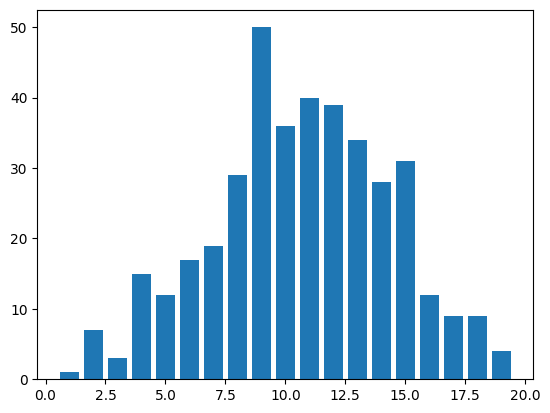

In [38]:
plt.bar(df['grade'].value_counts().index,df['grade'].value_counts())
import scipy.stats as stats
stats.shapiro(df['grade'])

<Axes: >

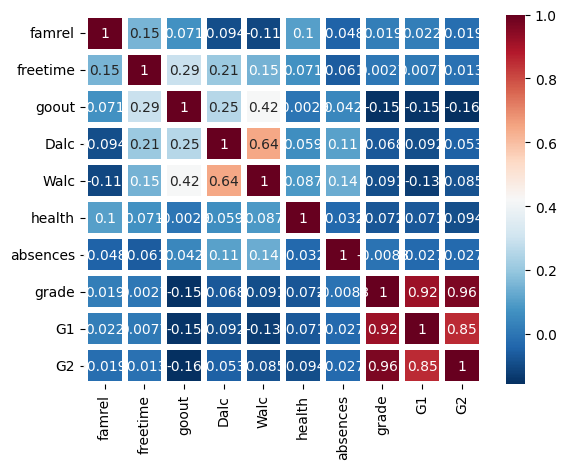

In [39]:
import seaborn as sns

df_cor=df[[ 'famrel', 'freetime', 'goout',  'Dalc', 'Walc', 'health', 'absences', 'grade', 'G1', 'G2']].corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns,yticklabels=df_cor.columns,cmap='RdBu_r',annot=True,linewidth=3)

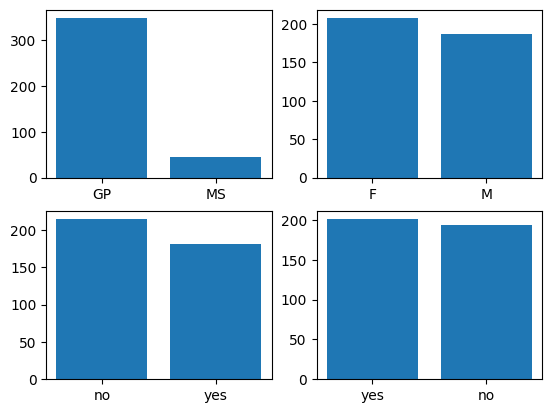

In [40]:
fig, ax= plt.subplots(2,2)
ax[0][0].bar(df['school'].value_counts().index,df['school'].value_counts())
ax[0][1].bar(df['sex'].value_counts().index,df['sex'].value_counts())
ax[1][0].bar(df['paid'].value_counts().index,df['paid'].value_counts())
ax[1][1].bar(df['activities'].value_counts().index,df['activities'].value_counts())
plt.show()


In [41]:
desc_df=df.describe()
desc_df.loc['ratio',:]=desc_df.loc['count',:]/df.shape[0]

In [42]:
desc_df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000
ratio,0.997468,0.994937,0.992405,0.989873,0.994937,0.989873,0.992405,1.000000,1.000000,1.000000


In [43]:
df.info()
#결측치는 KNN으로 impute -> 거리가 계산이 가능한 수치형 변수만 가능
#타입은 onehot 같은 걸로ㅗ 인코딩
# 종속변수 와 G1,G2 제외 상관성이 거의 없음. 파생변수 활용 필요
#G1 G2는  관계가 커보임
# 독립변수중 학교는 좀 분포 비대칭

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [44]:
from sklearn.impute import KNNImputer

KNN_data=df.drop(columns=['school','sex','paid','activities'])
imputer=KNNImputer()
df_filled=imputer.fit_transform(KNN_data)
df_filled=pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns]=df_filled
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [45]:
df=pd.get_dummies(data=df,columns=['school','sex','paid','activities'],drop_first=True)

In [46]:
# 4. 데이터 분할 방법 2가지를 쓰고 적절한 데이터 분할을 적용하시오 이를 선택한 이유
# 1) 랜덤분할 홀드아웃
# 2. 층화 추출 기법
# EDA 결과 학교에 따라 다르기 때문 입력 데이터 분포에 따라 잘나누고, 증강 할것같은데
# 여기에선 y 가 연속적이라 안씀, 층화 추출은 y가 범주형에으로 클래스 편향 막기
from sklearn.model_selection import train_test_split
X=df.drop('grade',axis=1)
y=df['grade']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3, random_state=2022, )#stratify= )

In [47]:
#5. svm, xgboost, randomforest 아ㄹ고리즘 공통점 쓰고 성적예측에 적합한
# 1) 회귀 분류 모델모두 할수 있다.
# 2) 범주형 변수를 독립변수로 사용할 수 없다.
# 3) 과대 과소 적합 피하기 위한 매개변수 설정 필요
# 4) 회귀분석에서 다중 공선성의 문제를 해결할 수 있다. svm은 커널트릭, 트리는  다중공선성 해결할수 있다.
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

from sklearn.model_selection import GridSearchCV
param_grid=[{'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10]}]
# grid_svm=GridSearchCV(SVR(kernel='linear'),param_grid=param_grid,cv=5)
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv)

grid_svm=GridSearchCV(SVR(kernel='rbf'),param_grid=param_grid,cv=5)
grid_svm.fit(X_train_scaled,Y_train)
result=pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score']=grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score',ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.960943
11,10.0,0.010,0.957198
16,100.0,0.010,0.947653
10,10.0,0.001,0.941800
6,1.0,0.010,0.921494
12,10.0,0.100,0.861286
17,100.0,0.100,0.857767
7,1.0,0.100,0.785883
5,1.0,0.001,0.303419
2,0.1,0.100,0.283644


In [48]:
svr=SVR(kernel='rbf',C=100,gamma=0.001) #
svr.fit(X_train_scaled,Y_train)
print("R2",svr.score(X_test_scaled,Y_test))
print("rmse",np.sqrt(mean_squared_error(Y_test,svr.predict(X_test_scaled))))


R2 0.9574167117380976
rmse 0.7752971184169034


In [57]:
rf_grid=[{'max_depth':[2,4,6,8,10],'min_samples_split':[2,4,6,8,10]}]
rf=GridSearchCV(RandomForestRegressor(n_estimators=1000),param_grid=rf_grid,cv=5)
rf.fit(X_train,Y_train)
print(rf.best_params_)
# rf=RandomForestRegressor(n_estimators=100,**rf.best_params_)
print("R2",rf.score(X_test,Y_test))
print("RMSE",np.sqrt(mean_squared_error(Y_test,rf.predict(X_test))))

{'max_depth': 10, 'min_samples_split': 4}
R2 0.9546083921871331
RMSE 0.8004539566177824




| 파라미터                    | 설명                                                                                       |
| ----------------------- | ---------------------------------------------------------------------------------------- |
| `max_depth`             | 각 트리의 최대 깊이. 클수록 복잡한 모델. `과적합 주의`.                                                       |
| `max_leaves`            | 리프(leaf node)의 최대 개수. `grow_policy='lossguide'`일 때 사용.                                   |
| `max_bin`               | Histogram 기반 tree method (`hist`, `gpu_hist`)에서 feature를 정렬할 bin 개수. `메모리 vs 속도` 트레이드오프. |
| `grow_policy`           | 트리를 확장하는 방식:<br>• `'depthwise'`: 깊이 우선 (기본값)<br>• `'lossguide'`: 손실 기반 확장                |
| `learning_rate` (`eta`) | 학습률. `작을수록 학습이 느리지만 일반화 성능 좋음`.                                                          |
| `n_estimators`          | 전체 boosting round (즉, 트리 개수).                                                            |
| `verbosity`             | 로그 출력 레벨. `0=silent`, `1=warning`, `2=info`, `3=debug`                                   |
| `objective`             | 목적 함수. 예: `'reg:squarederror'`, `'binary:logistic'`, `'multi:softprob'` 등.               |
| `booster`               | 부스팅 방식. 보통 `'gbtree'` (트리 기반), `'dart'` (드롭아웃 부스팅), `'gblinear'` (선형 모델).                |
| `tree_method`           | 트리 학습 방법:<br>• `'auto'`<br>• `'exact'`<br>• `'approx'`<br>• `'hist'`<br>• `'gpu_hist'`   |
| 파라미터                | 설명                                                       |
| ------------------- | -------------------------------------------------------- |
| `gamma`             | 분할(split) 최소 손실 감소값. `클수록 덜 분할됨`, 즉 보수적.                 |
| `min_child_weight`  | 리프 노드가 가져야 할 최소의 hessian 합. `값이 클수록 트리 분할 억제`.           |
| `max_delta_step`    | 한 트리의 leaf 가중치의 최대 변화량. 드물게 사용됨.                         |
| `subsample`         | 각 트리 학습 시 사용할 샘플 비율 (0\~1). `과적합 방지용`.                   |
| `sampling_method`   | subsample 샘플링 방식. `'uniform'` (기본값), `'gradient_based'`. |
| `colsample_bytree`  | 트리마다 사용할 feature 비율.                                     |
| `colsample_bylevel` | 각 레벨마다 사용할 feature 비율.                                   |
| `colsample_bynode`  | 각 노드마다 사용할 feature 비율.                                   |
| `reg_alpha`         | L1 정규화 계수 (Lasso). `가중치를 0으로 만드는 경향`.                    |
| `reg_lambda`        | L2 정규화 계수 (Ridge). `가중치를 작게 유지하는 경향`.                    |
| `scale_pos_weight`  | 불균형한 데이터에서 양성 클래스의 가중치. 예: rare한 1 클래스가 있을 때 사용.         |


In [ ]:
xg_grid=[{'max_depth':[2,4,6,8,10]}]#,'n_estimators':[1000,5000],'learning_rate':[0.01,0.001]}]
xg=GridSearchCV(XGBRegressor(n_estimators=1000),param_grid=xg_grid,cv=5)
xg.fit(X_train,Y_train)
print(xg.best_params_)
print("R2",xg.score(X_test,Y_test))
print("RMSE",np.sqrt(mean_squared_error(Y_test,xg.predict(X_test))))
#결과가 처음 teset, valid 나눌때, cv  에따라  달라짐 랜덤 스테이트 고정할 필요 있음

{'max_depth': 8}
R2 0.9569358092115691
RMSE 0.7796626290745525


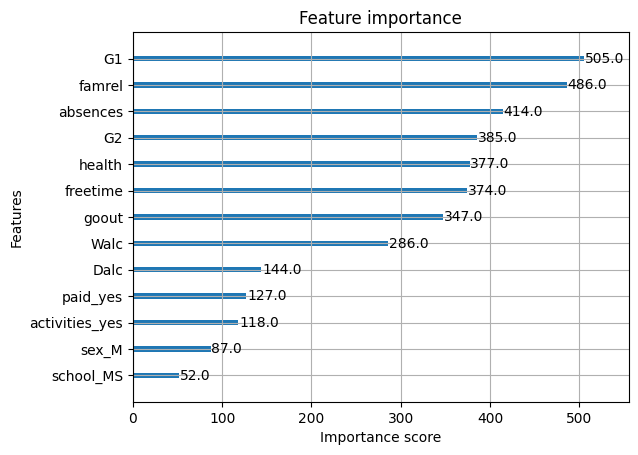

In [ ]:
from xgboost import plot_importance

plot_importance(xg.best_estimator_)
plt.show()
# 2. plot_importance(xg.best_estimator_)
# → Raw 중요도 값 (예: 몇 번의 분할에 사용됐는지)
# 기본값은 importance_type="weight", 즉 분할 횟수 (split count) 를 그대로 표시

In [61]:
xg.best_estimator_.feature_importances_


array([1.1231552e-03, 1.0402746e-03, 1.4072220e-03, 1.9009085e-03,
       3.2450072e-03, 2.5988698e-03, 1.3496344e-02, 3.6415543e-02,
       9.3380594e-01, 2.4868057e-03, 3.5417677e-04, 1.2667543e-03,
       8.5898041e-04], dtype=float32)

In [ ]:
#통계 1-1: 데이터를 8:2로 분할할고 선형회귀를 적용하시오 결정계수와 rmse를 구하시오
import pandas as pd
import numpy as np
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df= pd.read_csv("boston_house_prices.csv",skiprows=[0])
X=raw_df.iloc[:,:-1]
y=raw_df.iloc[:,-1]

# X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# y = raw_df.values[1::2, 2]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=0)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
scaler=StandardScaler()
scaler_y=StandardScaler()
lr=LinearRegression()
lr.fit(scaler.fit_transform(X_train),
        scaler_y.fit_transform(Y_train.values.reshape(-1,1)))

print("R2",lr.score(scaler.transform(X_test),scaler_y.transform(Y_test.values.reshape(-1,1))))
print("rmse",np.sqrt(mean_squared_error(Y_test.values.reshape(-1,1),
                                        scaler_y.inverse_transform(lr.predict(scaler.transform(X_test)).reshape(-1,1)))))

R2 0.5892223849182512
rmse 5.7835093150851336


In [ ]:
# 통계 1-2
# 8:2 분리후 릿지 회귀. 알파를 0~ 1까지 0.1 단위 탐색 
alpha=np.arange(0,1.1,0.1)
from sklearn.preprocessing import StandardScaler
# ridge=Ridge(normalize=True) 삭제됨
scaler=StandardScaler()
scaler_y=StandardScaler()
ridge=Ridge() 
param_grid={'alpha':alpha}
ridge_model=GridSearchCV(ridge,param_grid=param_grid)
ridge_model.fit(scaler.fit_transform(X_train),scaler_y.fit_transform(Y_train.values.reshape(-1,1)))
print(ridge_model.best_params_)#월래 0.1 뜸 데이터셋이 이상
print("R2",ridge_model.score(scaler.transform(X_test),
                                scaler_y.transform(Y_test.values.reshape(-1,1))))# 0.73정도
print("rmse",np.sqrt(mean_squared_error(Y_test.values.reshape(-1,1),
                                        scaler_y.inverse_transform(ridge_model.predict(scaler.transform(X_test)).reshape(-1,1)))))


{'alpha': 1.0}
R2 0.5881400471345535
rmse 5.791123645195353


In [ ]:
# 통계 1-3
# 8:2 분리후 라쏘 회귀. 알파를 0~ 1까지 0.1 단위 탐색 
alpha=np.arange(0,1.1,0.1)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# ridge=Ridge(normalize=True) 삭제됨
scaler=StandardScaler()
scaler_y=StandardScaler()
lasso=Lasso() 
param_grid={'alpha':alpha}
lasso_model=GridSearchCV(lasso,param_grid=param_grid)
lasso_model.fit(scaler.fit_transform(X_train),scaler_y.fit_transform(Y_train.values.reshape(-1,1)))
print(lasso_model.best_params_)#월래 0.1 뜸 데이터셋이 이상
print("R2",lasso_model.score(scaler.transform(X_test),
                                scaler_y.transform(Y_test.values.reshape(-1,1))))# 0.73정도
print("rmse",np.sqrt(mean_squared_error(Y_test.values.reshape(-1,1),
                                        scaler_y.inverse_transform(lasso_model.predict(scaler.transform(X_test)).reshape(-1,1)))))

#결론 쓰는게 좋은 어떤 모델이 더 적합한것 같다.

{'alpha': 0.0}
R2 0.5892223849182501
rmse 5.783509315085141


In [ ]:
# 통계 2-1
# 단순 선형회귀를 다항 3차 항까지 적용시켜 계수를 구하고 3차항을 적용한 모델의 스캐터 플롯과 기울기 선을 그리시오
import pandas as pd
import numpy as np

m=100
X=6*np.random.rand(m,1) -3 # Uniform distribution (균등 분포) 구간: [0, 1) 사이의 값 중심 0 -3~3
y=3* X**3+ X**2 + 2*X +2 + np.random.randn(m,1)
line=np.linspace(-3,3,100,endpoint=False).reshape(-1,1)

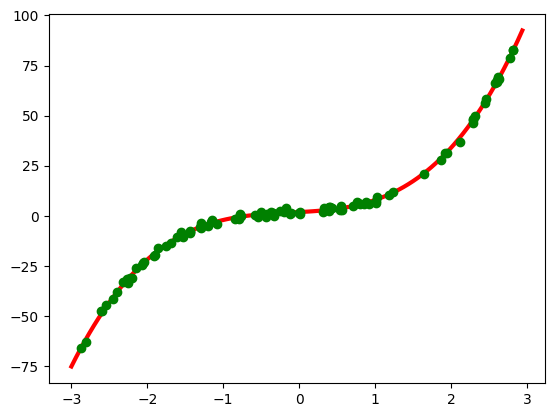

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=False) #sklearn 기본으로 intercept 알아서 계산해줌
poly.fit(X)
X_poly=poly.transform(X)
line_poly= poly.transform(line)
reg= LinearRegression().fit(X_poly,y)
plt.plot(line,reg.predict(line_poly),c='r',linewidth=3)
plt.plot(X,y,'o',c='g')

In [73]:
print(reg.coef_, reg.intercept_)

[[2.01214582 1.04383123 2.97595719]] [1.95307145]


In [100]:
#통계 3-1  변수 3개 하나는 연속형 나머지는 범주형 연속 변수 , 이원 분산분석 수행하고 통계표 작성해라
import pandas as pd
import numpy as np 

avocado= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/avocado.csv")
avocado=avocado[["AveragePrice","type","region"]]
avocado= avocado[(avocado['region']=='Orlando') | (avocado['region']=='Boston') |(avocado['region']=='Chicago')].reset_index(drop=True)
avocado


,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [105]:
# 분산 분석은 종속 변수에 대해 두개의 범주형 변수 ab의 영향으 ㄹ알아보기 위해 사용되는 검증 방법이다. 
# 상호작용효과에 대한 검정 가설
# H0 : 리전과 아보카도 타입에 대해 상호작용이 없다
# H1 : 리전과 아보카도 타입에 대해 상호작용이 있다.
# 주효과 검정에 대한 가설
# H0 : 리전 에 따른 가격 차이는 존재하지 않음. 
# H1 : 리전에 따른 가격 차이는 존해단다.
# H0 : 타입 종류에 따른 가격 차이는 존재하지 않음.
# H1 : 타입 종류에 따른 가격 차이는 존재한다.

AveragePrice=avocado['AveragePrice']
avocado_type=avocado['type']
region=avocado['region']

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# model1= ols('y~ C(temp)+C(pressure) + C(pressure):C(temp)', data= chem).fit()
# model1= ols('y~ C(temp)*C(pressure)', data= chem).fit()
formula="AveragePrice~C(avocado_type)*C(region)"
model = ols(formula,avocado).fit()
aov_table=anova_lm(model,typ=2)
aov_table
# 교호 효과도 있고, 주효과 1, 2 도 다있다. p 0.05 유의수준이하이기때문 

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


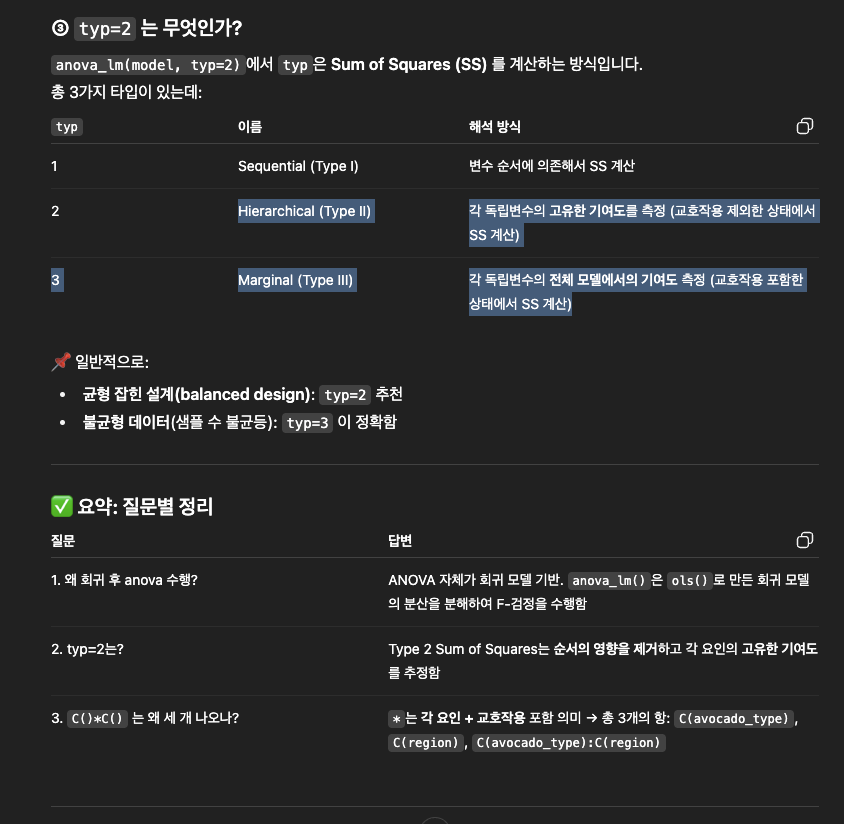

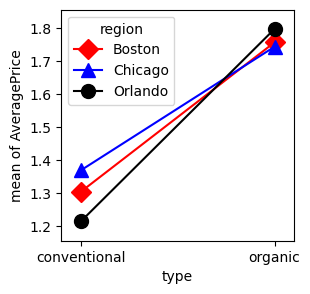

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(3,3))
fig=interaction_plot(x=avocado_type,
                    trace=region,
                    response=AveragePrice,
                    colors=['red','blue','black'],
                    markers=['D','^','o'],ms=10,ax=ax)

# 기울기가 다르다는것은 상호 작용 효과가 있다고 설명 할수 있다.

In [89]:
AveragePrice=avocado['AveragePrice']
avocado_type=avocado['type']
region=avocado['region']
avocado['cute']=[np.random.randint(2)for _ in range(avocado.shape[0])]
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# model1= ols('y~ C(temp)+C(pressure) + C(pressure):C(temp)', data= chem).fit()
# model1= ols('y~ C(temp)*C(pressure)', data= chem).fit()
formula="AveragePrice~C(avocado_type)*C(region)*C(cute)"
model = ols(formula,avocado).fit()
aov_table=anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),45.427486,1.0,719.146565,4.344253e-108
C(region),0.106097,1.0,1.679579,1.954280e-01
C(cute),0.003883,1.0,0.061464,8.042734e-01
C(avocado_type):C(region),0.710347,1.0,11.245260,8.433461e-04
C(avocado_type):C(cute),0.000158,1.0,0.002509,9.600693e-01
C(region):C(cute),0.027921,1.0,0.442004,5.063861e-01
C(avocado_type):C(region):C(cute),0.016891,1.0,0.267393,6.052573e-01
Residual,42.196629,668.0,NaN,NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# 2원은 동시에 분석이 안되고
# 예를 들어 두 범주형 변수(avocado_type, region)가 있다면 수동으로 조합해서 단일 그룹처럼 처리해야 합니다:
tukey_result = pairwise_tukeyhsd(endog=avocado['AveragePrice'], groups=avocado['region'], alpha=0.05)
print(tukey_result)
tukey_result = pairwise_tukeyhsd(endog=avocado['AveragePrice'], groups=avocado['type'], alpha=0.05)
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 Boston Chicago   0.0259 0.6073 -0.0379 0.0897  False
 Boston Orlando  -0.0247 0.6356 -0.0885 0.0391  False
Chicago Orlando  -0.0506  0.151 -0.1144 0.0132  False
-----------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
   group1     group2 meandiff p-adj lower  upper reject
-------------------------------------------------------
conventional organic   0.4705   0.0 0.4379 0.503   True
-------------------------------------------------------
